In [115]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (14, 40)
mpl.rcParams['axes.grid'] = False

In [116]:
#loading data
# path = 'https://raw.githubusercontent.com/YuvalRozner/BetterWeather/main/data/JER_data.csv'
path = 'data\JER_data.csv'
df = pd.read_csv(path)
df.head()

C:\Users\gr062\AppData\Local\Temp\ipykernel_17388\1301601356.py:4: DtypeWarning: Columns (1,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,Date Time,BP (hPa),DiffR (w/m^2),Grad (w/m^2),NIP (w/m^2),RH (%),TD (degC),TDmax (degC),TDmin (degC),WD (deg),WDmax (deg),WS (m/s),Ws1mm (m/s),Ws10mm (m/s),WSmax (m/s),STDwd (deg)
0,01/01/2000 00:00,-,NaN,NaN,NaN,-,17.3,17.4,17.3,102,97,1.6,2.4,1.7,2.8,9.8
1,01/01/2000 00:10,-,NaN,NaN,NaN,-,17.3,17.4,17.3,100,101,1.9,2.2,1.9,2.4,11.0
2,01/01/2000 00:20,-,NaN,NaN,NaN,-,17.3,17.3,17.3,89,88,1.9,2.1,2,2.4,9.9
3,01/01/2000 00:30,-,NaN,NaN,NaN,-,17.4,17.4,17.3,77,76,2.4,2.9,2.4,3.6,10.2
4,01/01/2000 00:40,-,NaN,NaN,NaN,-,17.3,17.4,17.1,73,85,2.6,2.8,2.6,3.2,8.9


In [117]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[::6]
df = df.drop(columns=['NIP (w/m^2)'])
df = df.drop(columns=['DiffR (w/m^2)'])
df = df.drop(columns=['Grad (w/m^2)'])

date_time = pd.to_datetime(df.pop('Date Time'), format="%d/%m/%Y %H:%M")

df = df.apply(pd.to_numeric, errors='coerce')

df.head()

,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WD (deg),WDmax (deg),WS (m/s),Ws1mm (m/s),Ws10mm (m/s),WSmax (m/s),STDwd (deg)
0,NaN,NaN,17.3,17.4,17.3,102.0,97.0,1.6,2.4,1.7,2.8,9.8
6,NaN,NaN,17.0,17.0,16.9,79.0,58.0,2.1,2.9,2.2,3.6,14.2
12,NaN,NaN,17.3,17.3,17.2,94.0,92.0,1.7,2.1,2.1,2.4,16.2
18,NaN,NaN,16.7,16.8,16.7,81.0,75.0,1.5,1.8,1.9,2.0,8.6
24,NaN,NaN,16.6,16.6,16.5,93.0,84.0,1.8,2.0,1.8,2.4,9.6


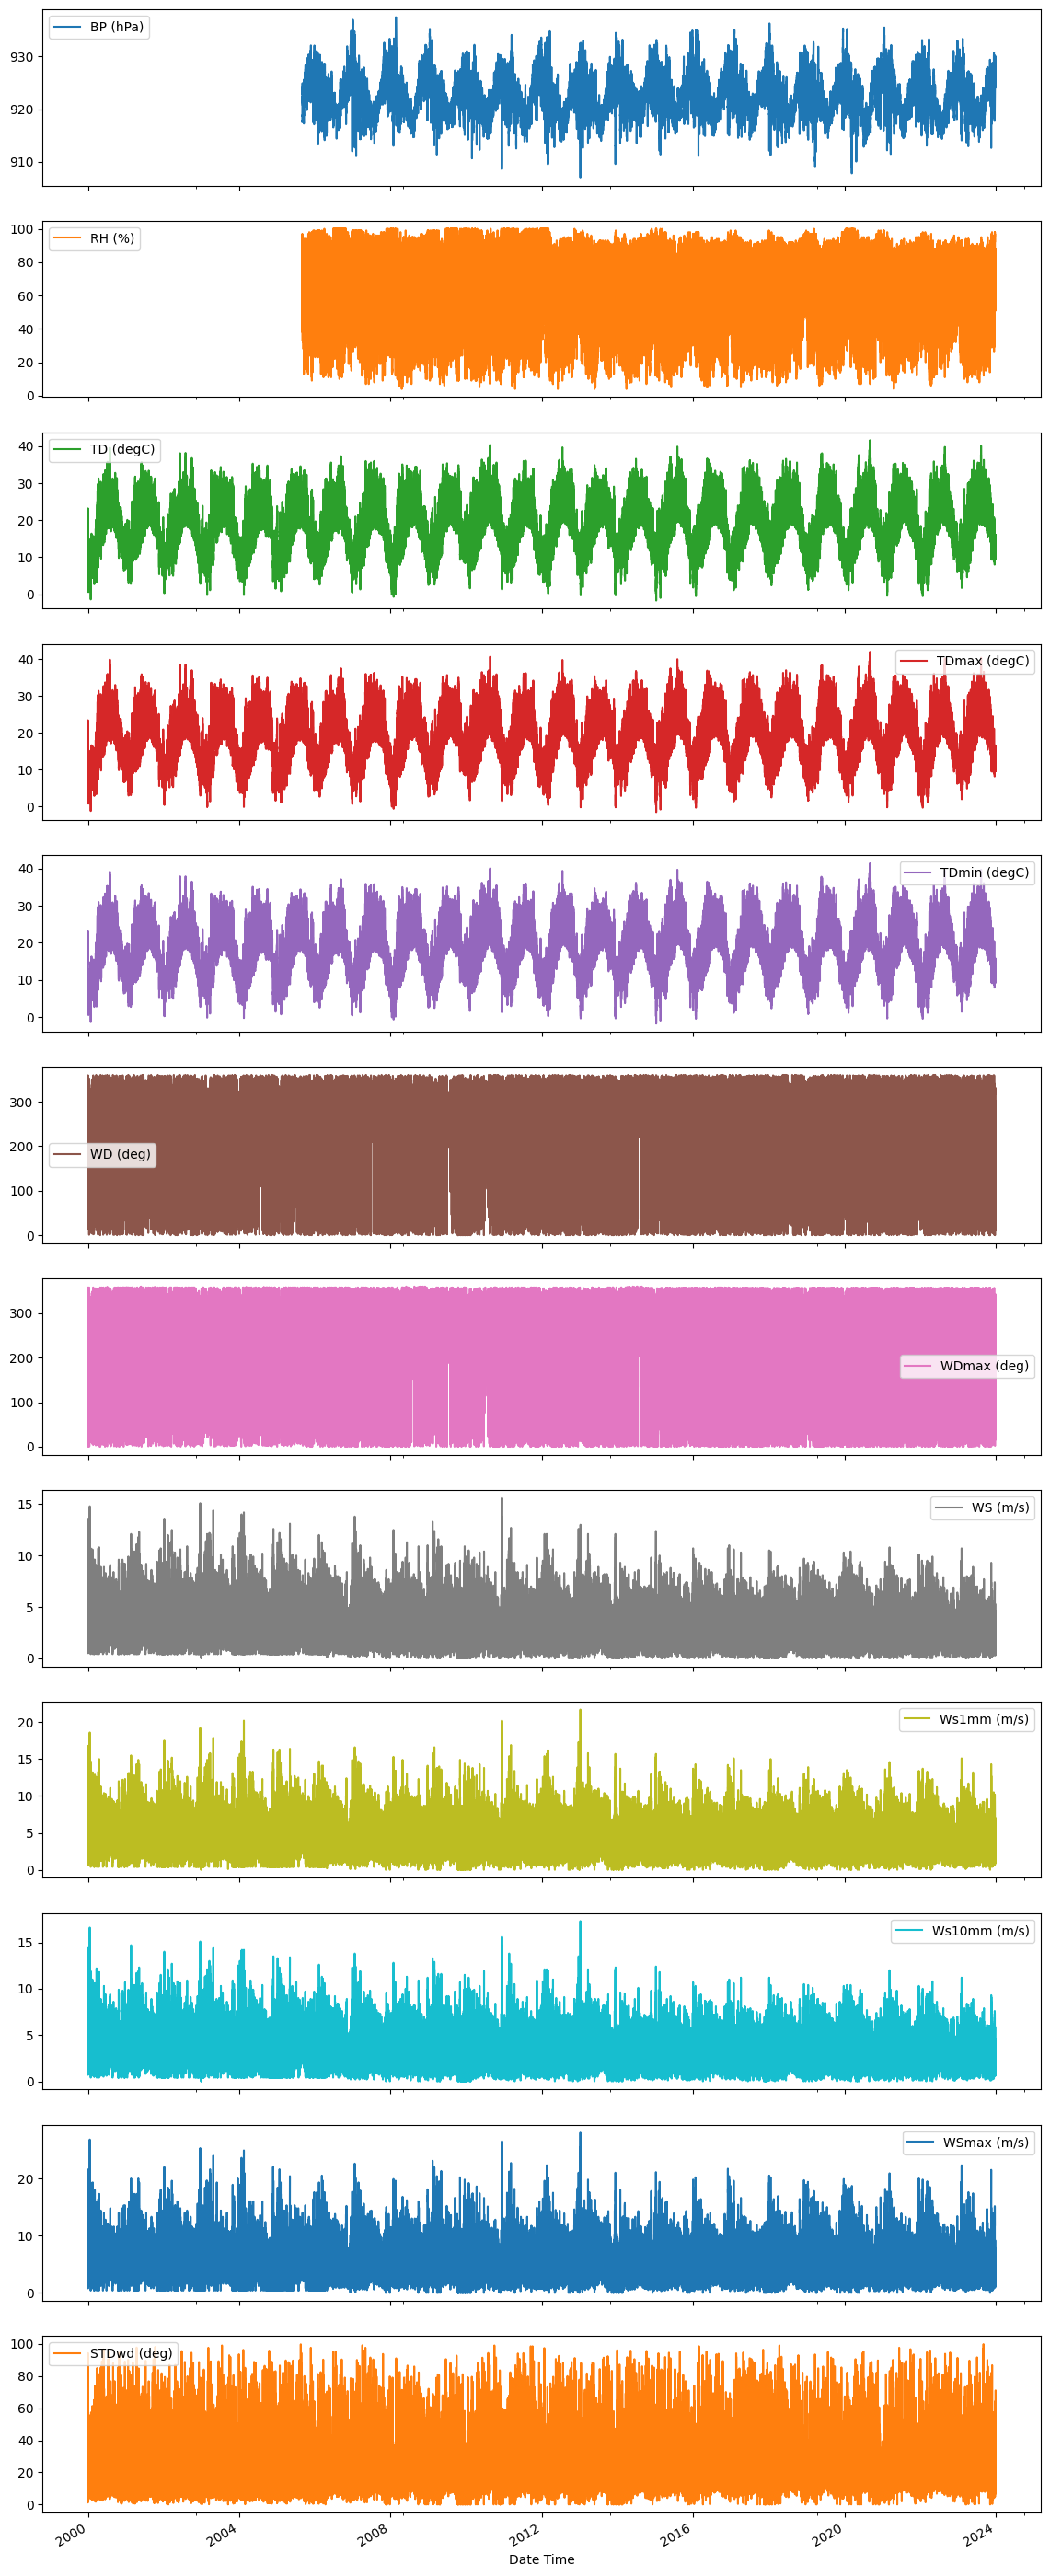

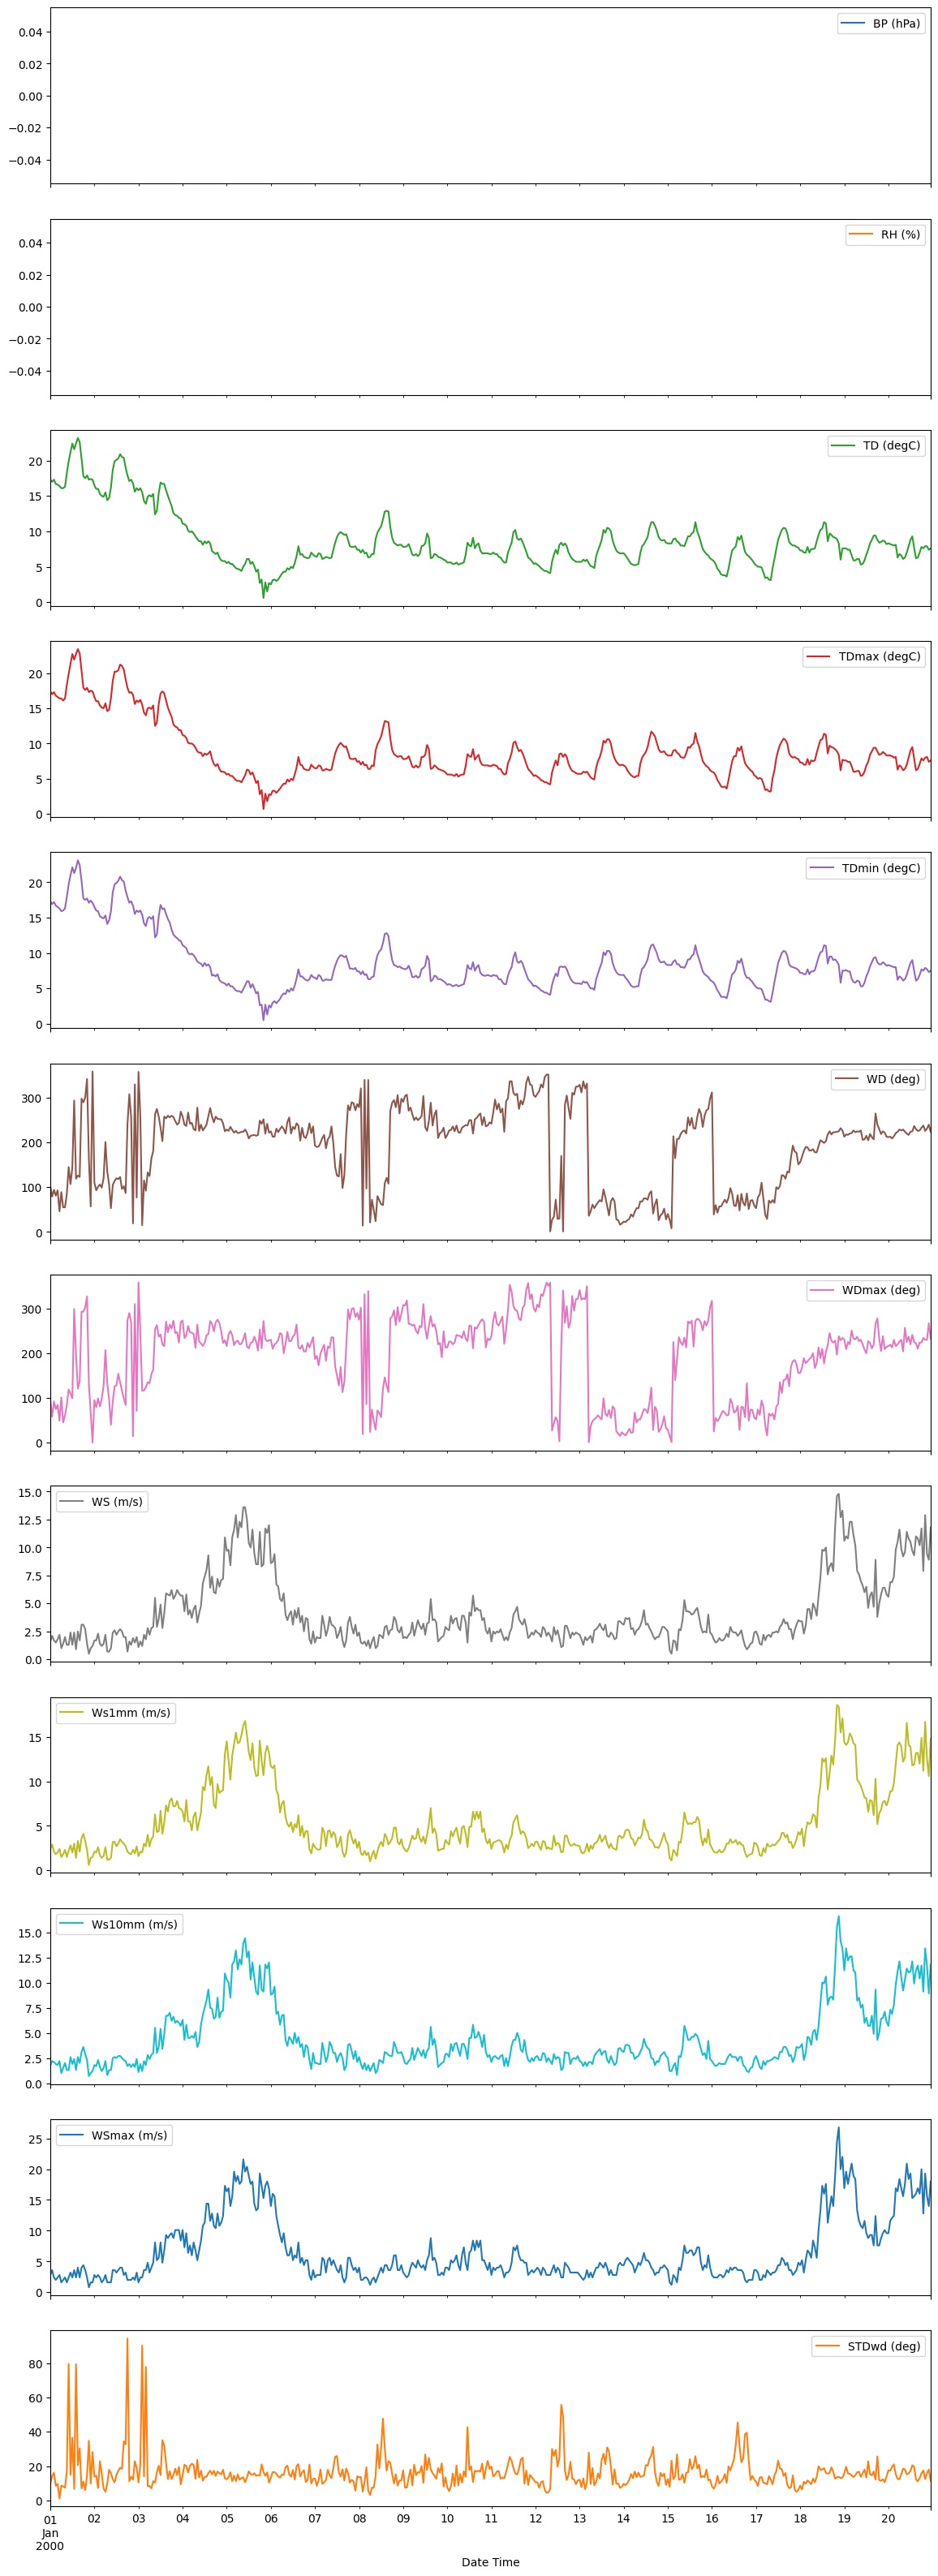

In [118]:
#plot_cols = ['WD (deg)', 'TD (degC)']
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BP (hPa),160487.0,922.490836,3.683396,907.04,919.76,922.3,924.93,937.44
RH (%),160231.0,57.103195,24.117456,4.00,37.00,56.0,79.00,100.00
TD (degC),209755.0,17.955506,7.041178,-1.70,12.10,18.3,23.30,41.60
TDmax (degC),209760.0,18.084489,7.084270,-1.60,12.30,18.4,23.40,42.00
TDmin (degC),209757.0,17.829548,6.999501,-1.80,12.00,18.2,23.10,41.40
WD (deg),209910.0,236.100962,90.439883,0.00,180.00,273.0,300.00,360.00
WDmax (deg),209856.0,235.435832,92.249904,0.00,173.00,273.0,301.00,360.00
WS (m/s),209652.0,3.336034,1.635589,0.00,2.10,3.2,4.30,15.60
Ws1mm (m/s),209647.0,4.489605,2.079202,0.00,3.00,4.3,5.70,21.70
Ws10mm (m/s),209655.0,3.590693,1.685942,0.00,2.40,3.4,4.60,17.30


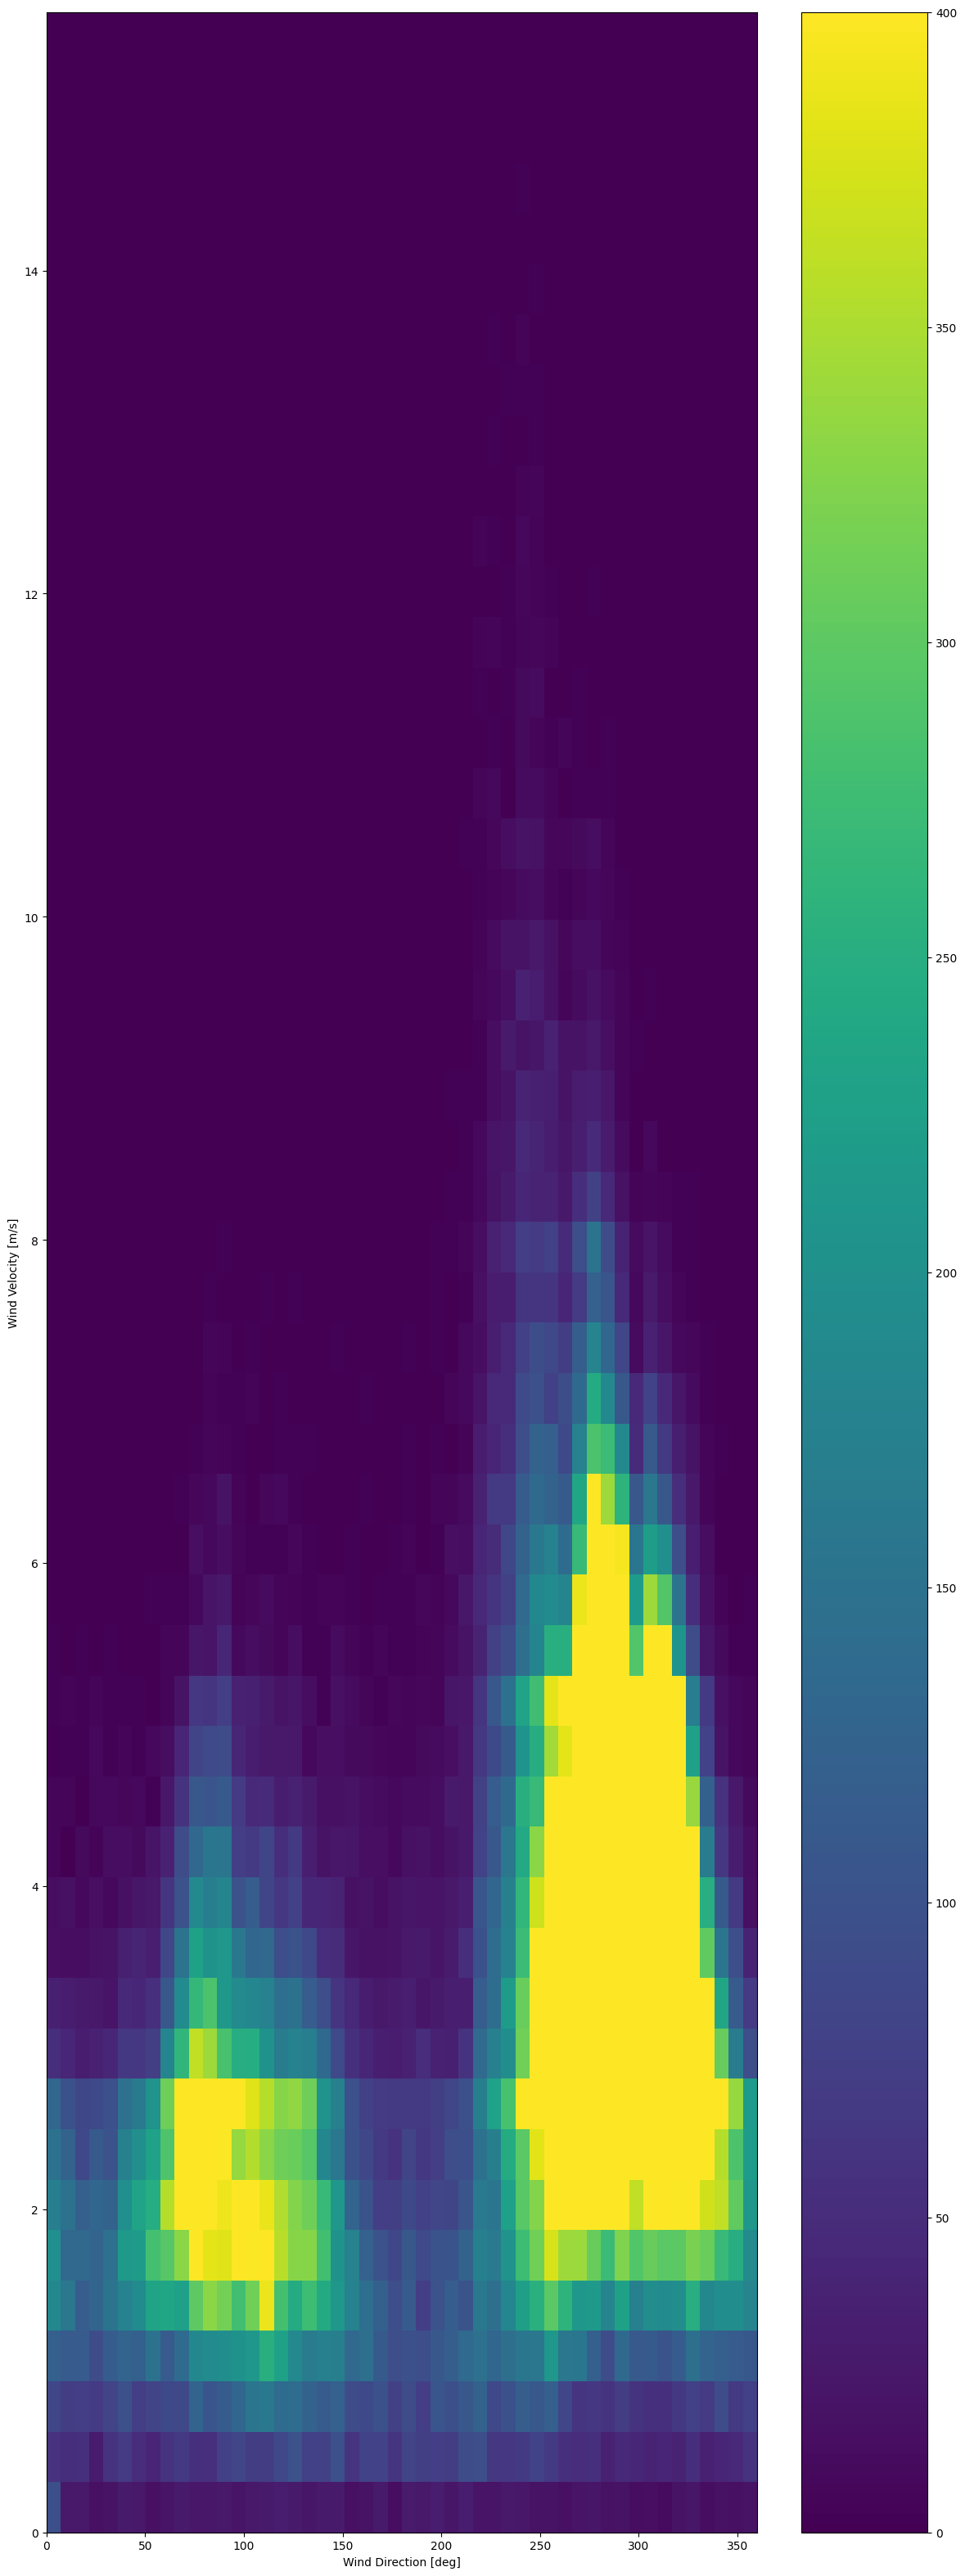

In [120]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['WD (deg)']) & ~np.isnan(df['WS (m/s)'])

# Create the 2D histogram plot
plt.hist2d(df['WD (deg)'][mask], df['WS (m/s)'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.show()

In [121]:
ws = df.pop('WS (m/s)')
max_ws = df.pop('WSmax (m/s)')

# Convert to radians.
wd_rad = df.pop('WD (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = ws*np.cos(wd_rad)
df['Wy'] = ws*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_ws*np.cos(wd_rad)
df['max Wy'] = max_ws*np.sin(wd_rad)

(-10.502361084944306, 7.44781847254617, -14.464068131241882, 8.89363423045623)

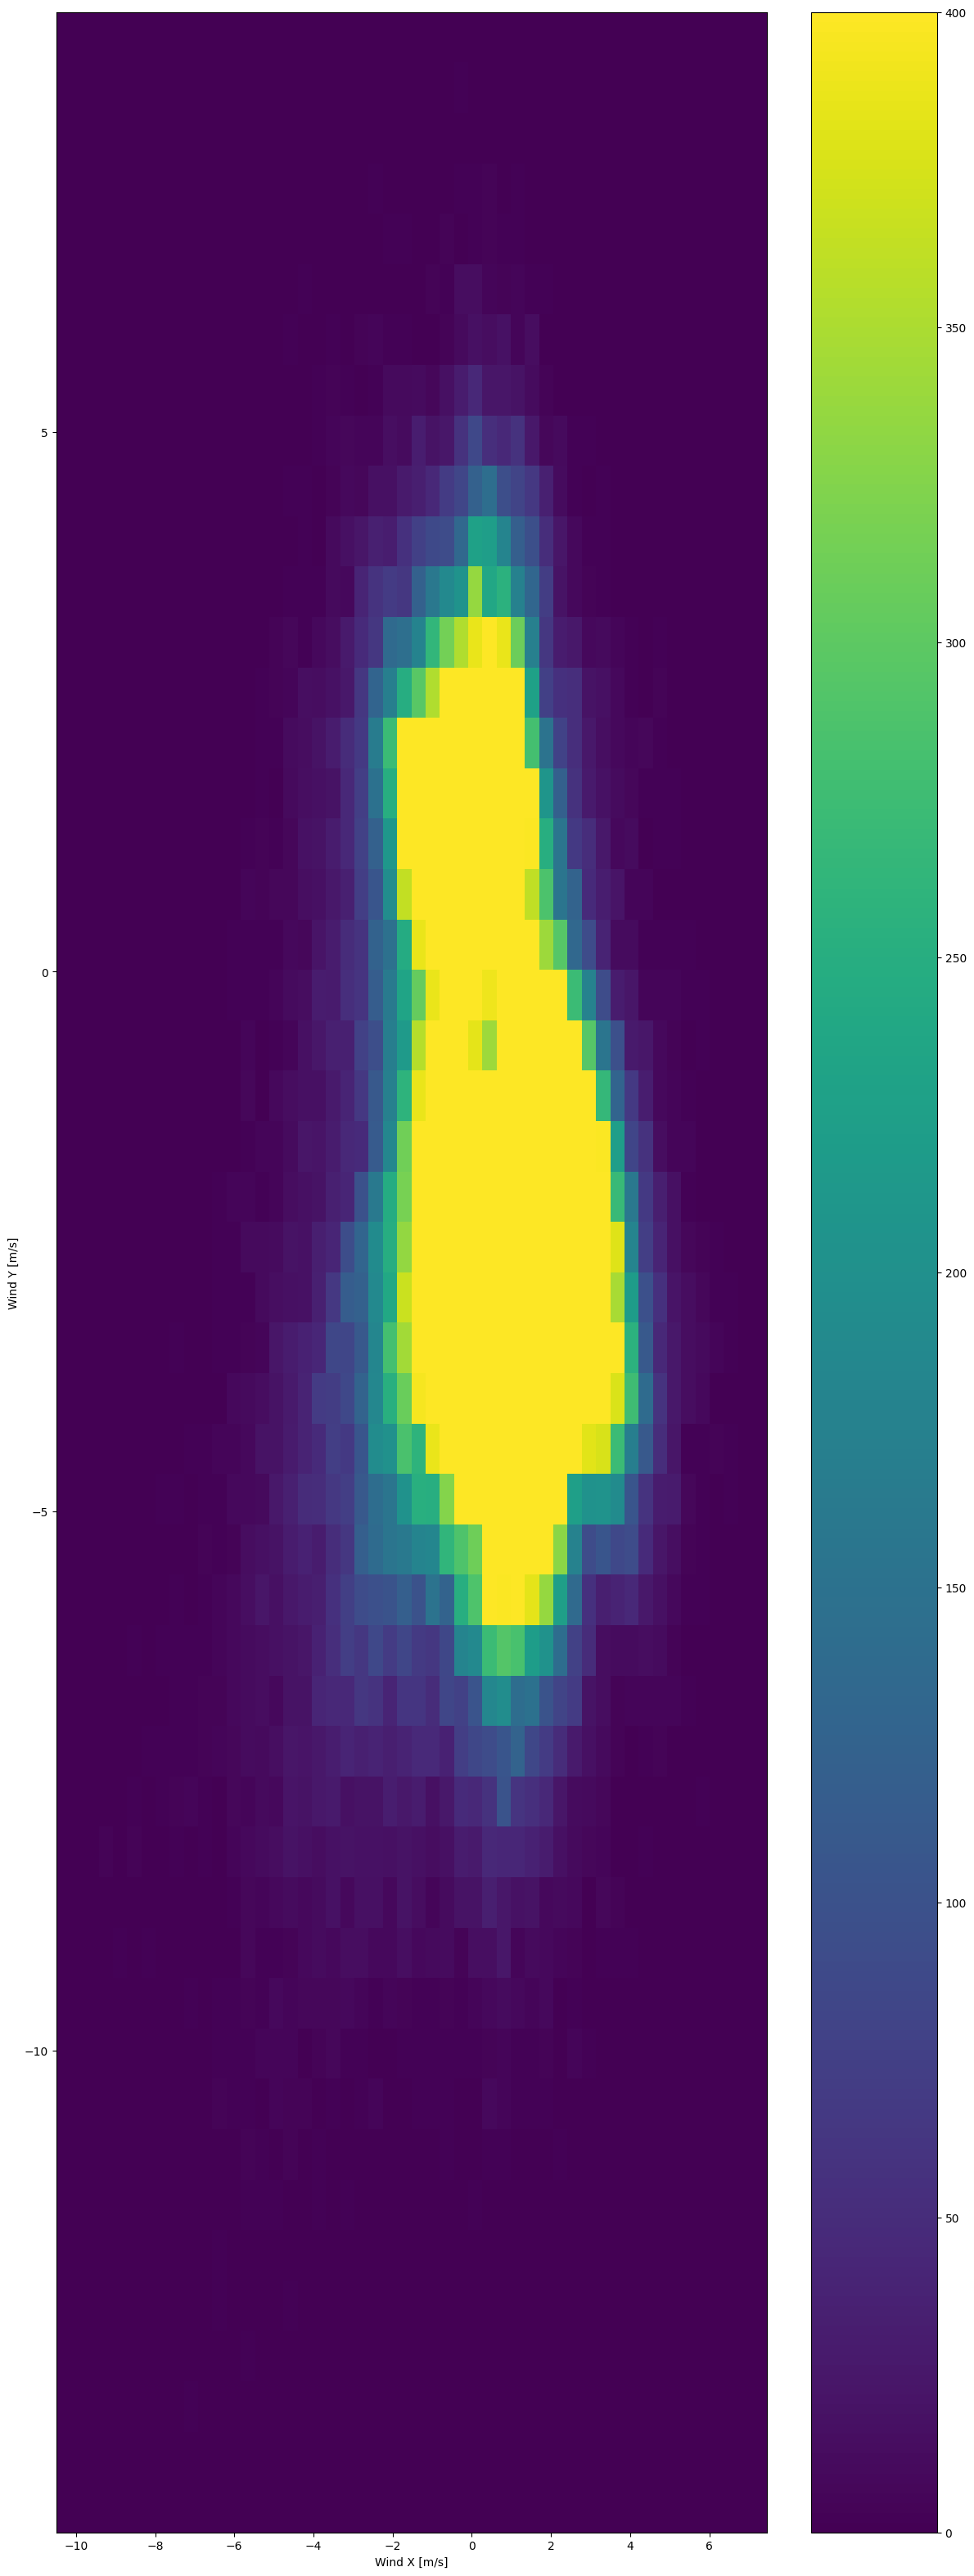

In [122]:
# Use boolean indexing to filter out NaN values for plotting
mask = ~np.isnan(df['Wx']) & ~np.isnan(df['Wy'])

plt.hist2d(df['Wx'][mask], df['Wy'][mask], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

#### Time

Similarly, the `Date Time` column is very useful, but not in this string form. Start by converting it to seconds:

In [123]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

Similar to the wind direction, the time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals:

In [124]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

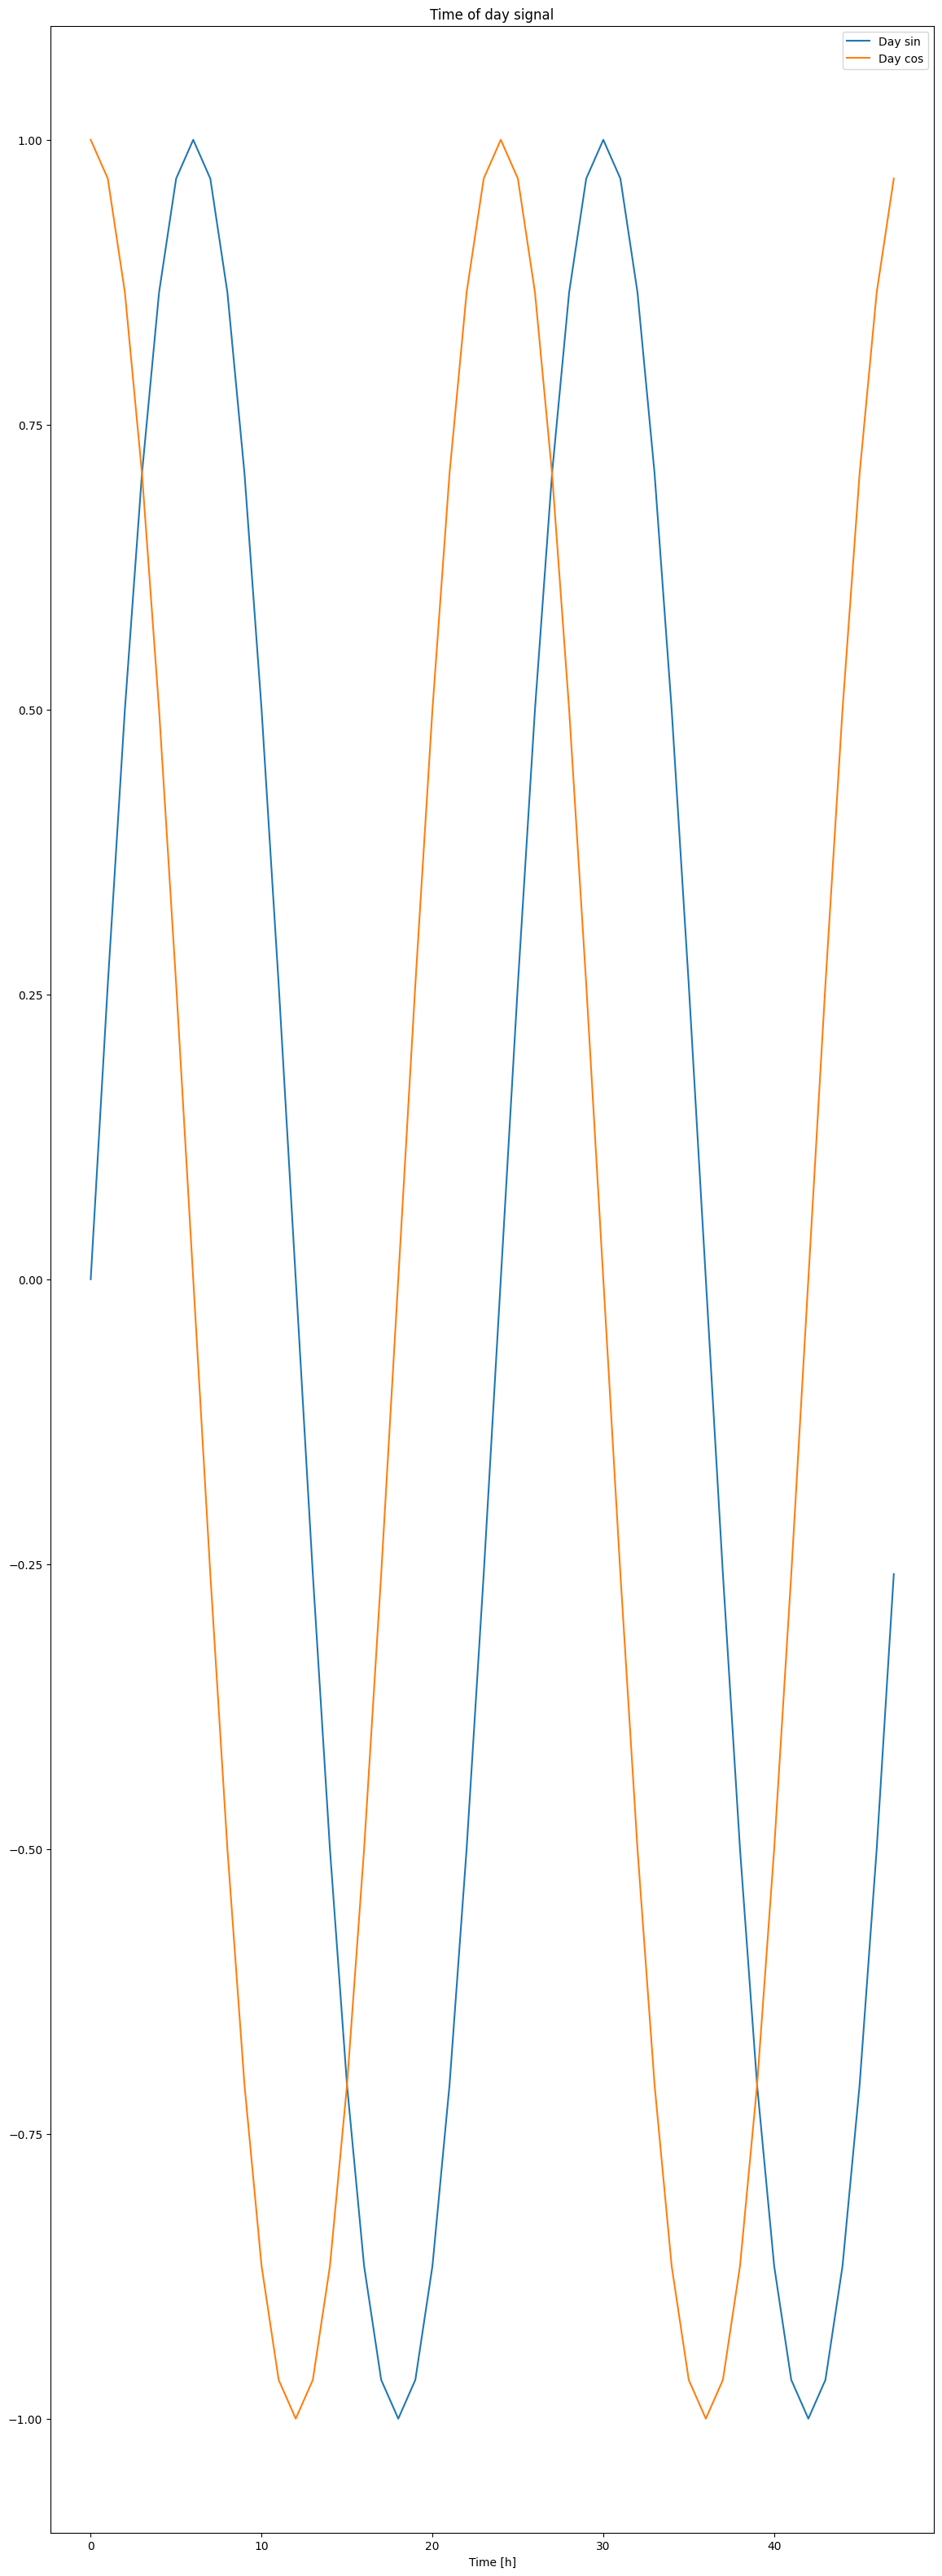

In [125]:
plt.plot(np.array(df['Day sin'])[:48])
plt.plot(np.array(df['Day cos'])[:48])
plt.legend(['Day sin', 'Day cos'])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you don't have that information, you can determine which frequencies are important by extracting features with <a href="https://en.wikipedia.org/wiki/Fast_Fourier_transform" class="external">Fast Fourier Transform</a>. To check the assumptions, here is the `tf.signal.rfft` of the temperature over time. Note the obvious peaks at frequencies near `1/year` and `1/day`:


In [126]:
# prompt: print columns of df

print(df.columns)
df.head()

Index(['BP (hPa)', 'RH (%)', 'TD (degC)', 'TDmax (degC)', 'TDmin (degC)',
       'WDmax (deg)', 'Ws1mm (m/s)', 'Ws10mm (m/s)', 'STDwd (deg)', 'Wx', 'Wy',
       'max Wx', 'max Wy', 'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')


,BP (hPa),RH (%),TD (degC),TDmax (degC),TDmin (degC),WDmax (deg),Ws1mm (m/s),Ws10mm (m/s),STDwd (deg),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
0,NaN,NaN,17.3,17.4,17.3,97.0,2.4,1.7,9.8,-0.332659,1.565036,-0.582153,2.738813,-5.461913e-12,1.000000,-0.004731,0.999989
6,NaN,NaN,17.0,17.0,16.9,58.0,2.9,2.2,14.2,0.400699,2.061417,0.686912,3.533858,2.588190e-01,0.965926,-0.004014,0.999992
12,NaN,NaN,17.3,17.3,17.2,92.0,2.1,2.1,16.2,-0.118586,1.695859,-0.167416,2.394154,5.000000e-01,0.866025,-0.003297,0.999995
18,NaN,NaN,16.7,16.8,16.7,75.0,1.8,1.9,8.6,0.234652,1.481533,0.312869,1.975377,7.071068e-01,0.707107,-0.002580,0.999997
24,NaN,NaN,16.6,16.6,16.5,84.0,2.0,1.8,9.6,-0.094205,1.797533,-0.125606,2.396711,8.660254e-01,0.500000,-0.001864,0.999998


In [127]:
######################################################
# fill the nan values in all colunms'
# TODO - data preprocessing need to arrange data in the start of the progrem
print(np.isnan(df).sum())
#df['TD (degC)'] = df['TD (degC)'].fillna(method='ffill').fillna(method='bfill')
df = df.fillna(method='ffill').fillna(method='bfill')
print(np.isnan(df).sum())


BP (hPa)        49630
RH (%)          49886
TD (degC)         362
TDmax (degC)      357
TDmin (degC)      360
WDmax (deg)       261
Ws1mm (m/s)       470
Ws10mm (m/s)      462
STDwd (deg)       228
Wx                473
Wy                473
max Wx            471
max Wy            471
Day sin             0
Day cos             0
Year sin            0
Year cos            0
dtype: int64
BP (hPa)        0
RH (%)          0
TD (degC)       0
TDmax (degC)    0
TDmin (degC)    0
WDmax (deg)     0
Ws1mm (m/s)     0
Ws10mm (m/s)    0
STDwd (deg)     0
Wx              0
Wy              0
max Wx          0
max Wy          0
Day sin         0
Day cos         0
Year sin        0
Year cos        0
dtype: int64


C:\Users\gr062\AppData\Local\Temp\ipykernel_17388\1893586496.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


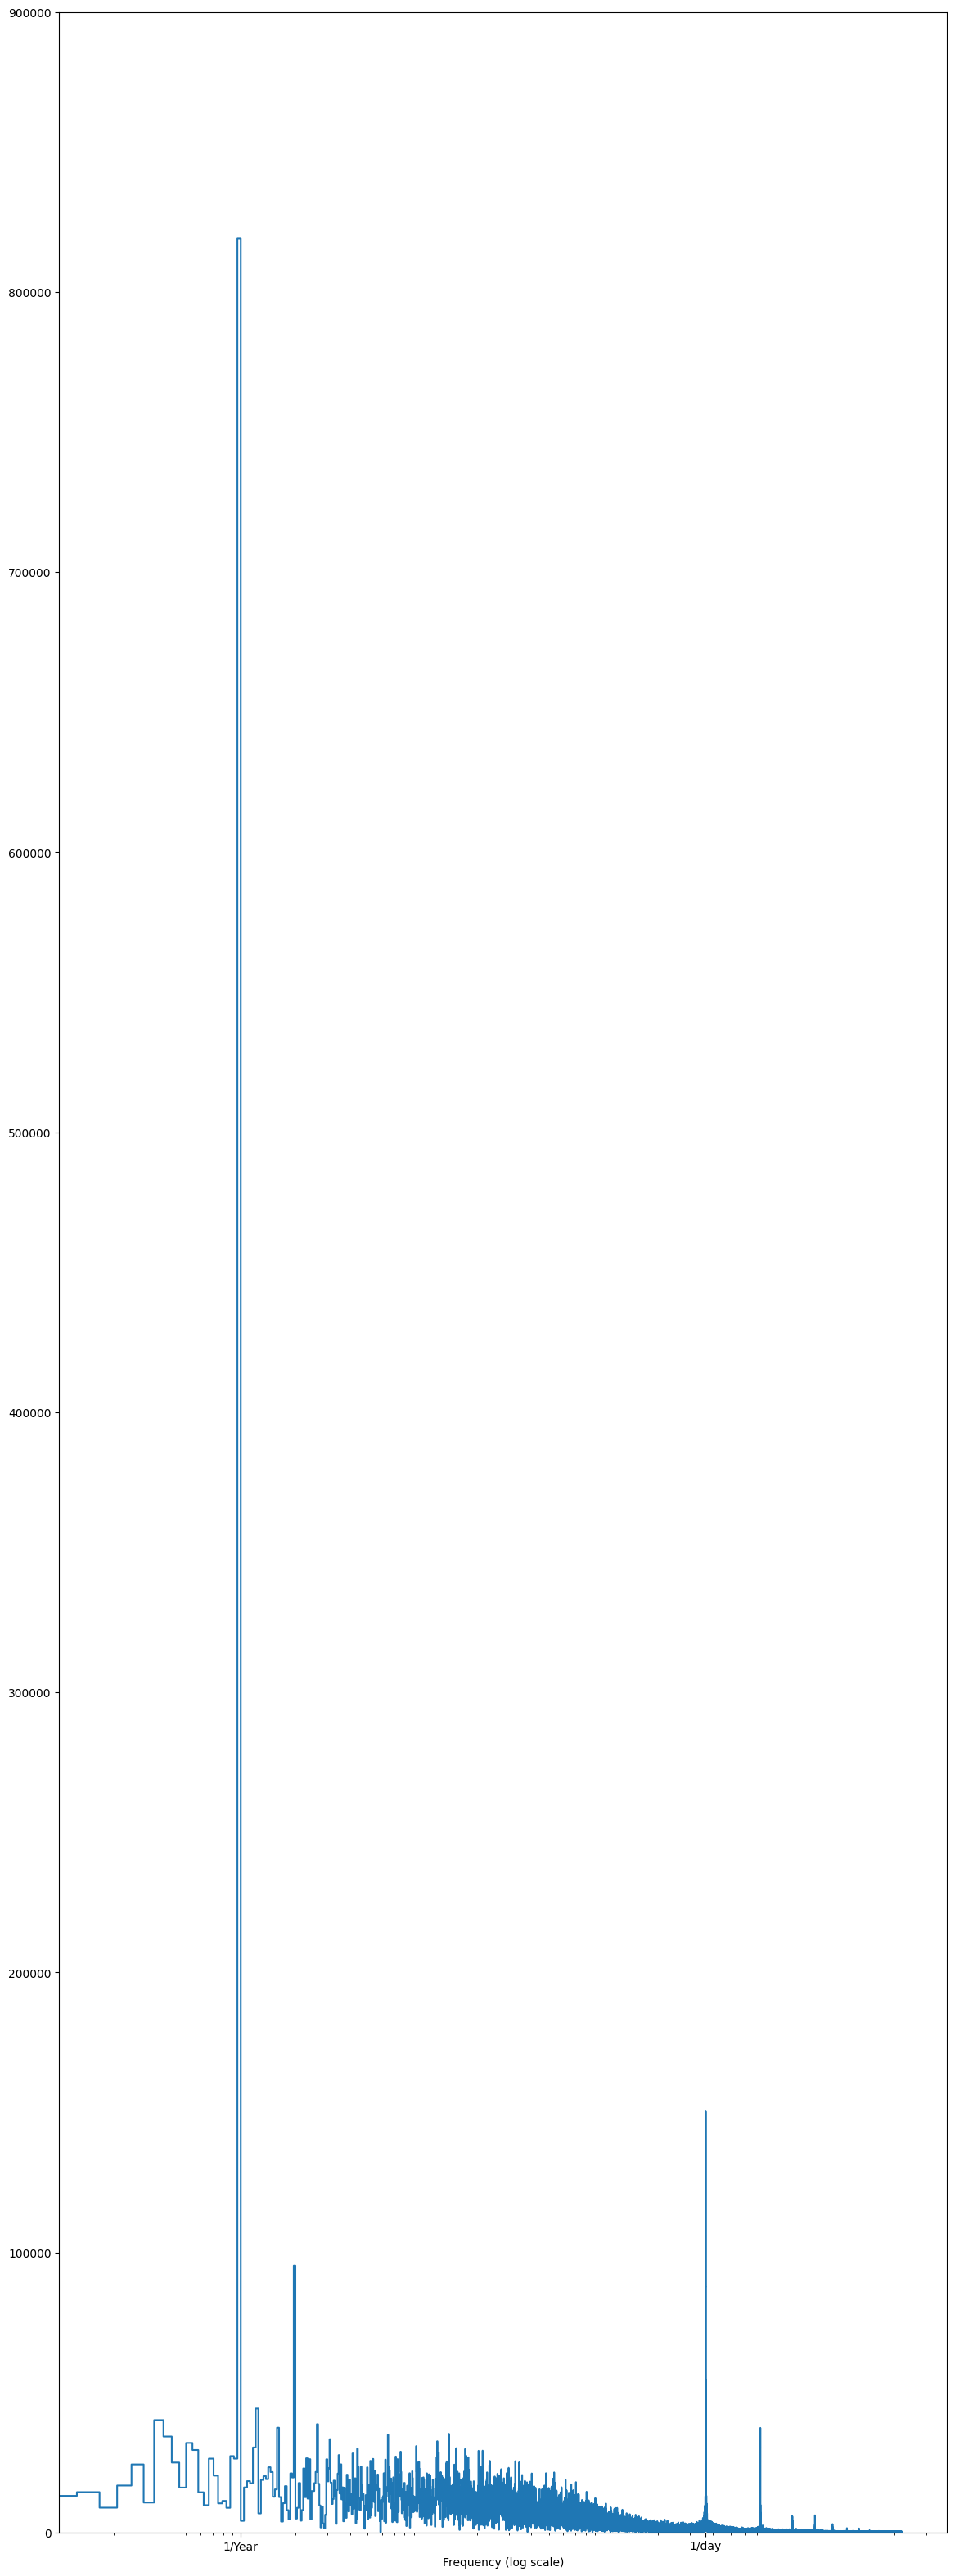

In [128]:
fft = tf.signal.rfft(df['TD (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['TD (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 900000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### Split the data

You'll use a `(70%, 20%, 10%)` split for the training, validation, and test sets. Note the data is **not** being randomly shuffled before splitting. This is for two reasons:

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.

In [129]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [130]:
train_mean_fixed = train_df.mean()
train_std_fixed = train_df.std()
train_normed_fixed = (train_df - train_mean_fixed) / train_std_fixed

In [131]:
window_size_day = 24 # 24 hours
rolling_mean_day = train_df.rolling(window=window_size_day, min_periods=1).mean()
rolling_std_day = train_df.rolling(window=window_size_day, min_periods=1).std()
train_normed_rolling_day = (train_df - rolling_mean_day) / rolling_std_day

In [132]:
window_size_year = 365*24  # 1 year
rolling_mean_year = train_df.rolling(window=window_size_year, min_periods=1).mean()
rolling_std_year = train_df.rolling(window=window_size_year, min_periods=1).std()
train_normed_rolling_year = (train_df - rolling_mean_year) / rolling_std_year

In [133]:
# Calculate the cumulative mean
cumulative_mean = train_df.expanding(min_periods=1).mean()
cumulative_std = train_df.expanding(min_periods=1).std()
train_normed_cumulative = (train_df - cumulative_mean) / cumulative_std

In [136]:
print(f"last value of the cumulative_mean:    {cumulative_mean['TD (degC)'].iloc[-1]}")
print(f"the value of the fixed_mean:          {cumulative_mean['TD (degC)'].iloc[-1]}")

last value of the cumulative_mean:    17.869728244980656
the value of the fixed_mean:          17.869728244980656


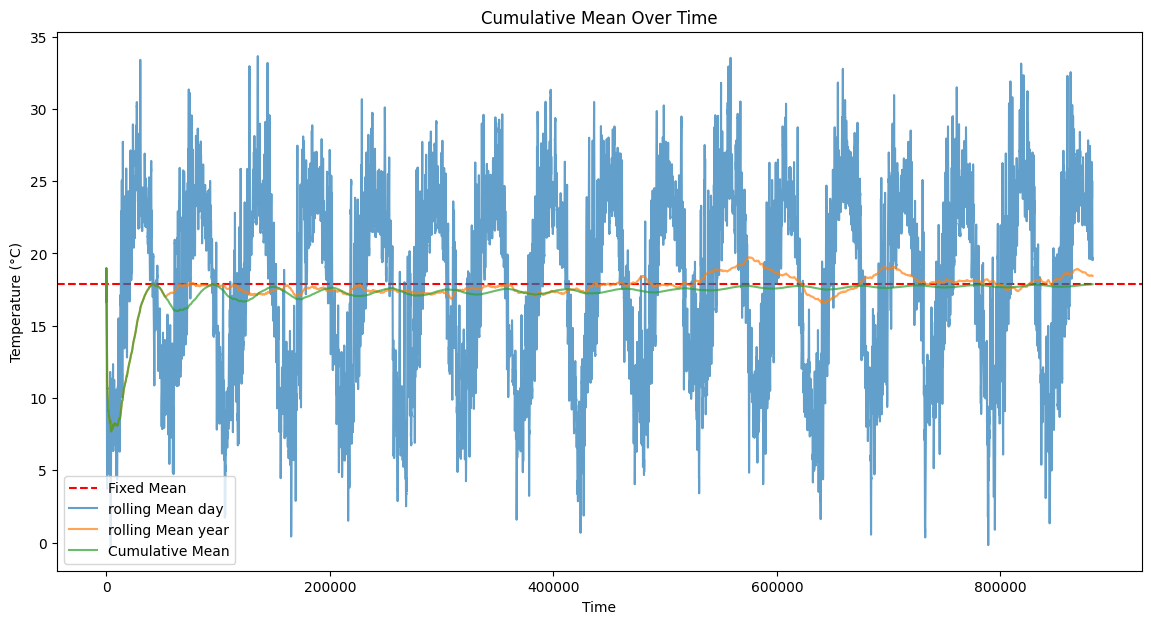

In [114]:
import matplotlib.pyplot as plt

# Plotting the cumulative mean
plt.figure(figsize=(14, 7))

# Plot fixed mean as a horizontal line
plt.axhline(y=train_mean_fixed['TD (degC)'], color='r', linestyle='--', label='Fixed Mean')

# Plot rolling day mean
plt.plot(rolling_mean_day.index, rolling_mean_day['TD (degC)'], label='rolling Mean day', alpha=0.7)

# Plot rolling year mean
plt.plot(rolling_mean_year.index, rolling_mean_year['TD (degC)'], label='rolling Mean year', alpha=0.7)

# Plot cumulative mean
plt.plot(cumulative_mean.index, cumulative_mean['TD (degC)'], label='Cumulative Mean', alpha=0.7)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Cumulative Mean Over Time')
plt.legend()

# Show the plot
plt.show()

In [1]:
import matplotlib.pyplot as plt

# Assuming these variables are pandas Series or similar
plt.figure(figsize=(12, 8))

#plt.plot(train_normed_fixed['TD (degC)'], label='Fixed Mean')
#plt.plot(train_normed_rolling_day['TD (degC)'], label='Rolling Day Mean')
#plt.plot(train_normed_rolling_year['TD (degC)'], label='Rolling Year Mean')
#plt.plot(train_normed_cumulative['TD (degC)'], label='Cumulative Mean')

#plt.plot(train_normed_cumulative['TD (degC)']-train_normed_fixed['TD (degC)'], label='Cumulative Mean')


plt.ylabel('Normalized Values')
plt.title('Comparison of Different Normalization Techniques')
plt.legend()
plt.grid(True)

plt.show()


NameError: name 'train_normed_cumulative' is not defined

<Figure size 1200x800 with 0 Axes>